In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
from scipy import stats
import pickle
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('seaborn')

In [2]:
# open the file of interest, and use pickle loading
infile = open ("qcd_100000_pt_1000_1200.pkl",'rb')
background_dict = pickle.load(infile)

# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
signal_dict = pickle.load(infile)

# list all keys of the files
keys = background_dict.keys()

### Mass

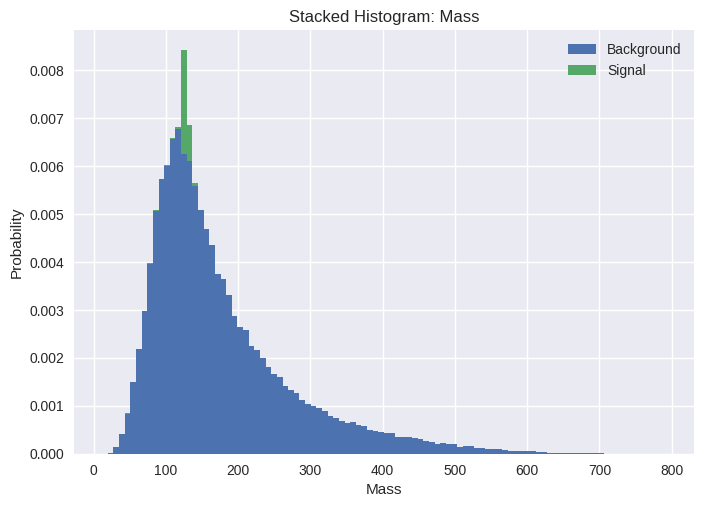

In [3]:
fig, ax = plt.subplots(1,1)

bkg_mass = background_dict['mass']
sig_mass = signal_dict['mass']

data = [bkg_mass, sig_mass]

bkg_weight = np.array([2000]*len(bkg_mass))
sig_weight = np.array([50]*len(sig_mass))

a = ax.hist(data, bins=100, density=True, stacked=True, weights=[bkg_weight, sig_weight], label=["Background", "Signal"])

ax.set_xlabel("Mass")
ax.set_ylabel("Probability")
ax.set_title("Stacked Histogram: Mass")

plt.legend(loc=0)
plt.show()

In [4]:
expected_sig = stats.poisson.cdf(2050, 2000, loc=0)
expected_sig

0.8703871254450806

In [5]:
n_higgs = 50
n_qcd = 2000

sig = n_higgs / np.sqrt(n_qcd)
sig

1.118033988749895

In [6]:
bins = 100
bkd_hist = ax.hist(bkg_mass, bins, range=[0,round(a[1][-1])], weights=bkg_weight / 100000)
sig_hist = ax.hist(sig_mass, bins, range=[0,round(a[1][-1])], weights=sig_weight / 100000)

In [7]:
expected_sig = []
for i in range(bins):
    qcd = bkd_hist[0][i] 
    higgs = sig_hist[0][i] 
    prob = stats.poisson.cdf(qcd+higgs, qcd, loc=0)
    expected_sig.append(stats.norm.ppf(prob, loc=0, scale=1))

expected_sig = np.array(expected_sig)
expected_sig[np.isinf(expected_sig)] = 0

expected_sig

array([ 0.00000000e+00,  2.05786959e+00,  1.30961780e+00,  6.07986479e-01,
        1.28652803e-01, -9.30195439e-02,  1.38658957e-01,  1.15921413e-01,
        1.02737055e-01,  1.92176436e-02,  2.36622805e-02,  2.62519661e-02,
        5.16588312e-02,  4.96360886e-02,  1.10338570e-01,  2.13379193e+00,
        2.31695719e+00,  2.87828124e-01,  2.48370862e-02, -1.27480408e-02,
        1.73761470e-02, -1.16576550e-02,  1.38666189e-02,  5.02426196e-02,
        6.82552653e-03, -3.82189168e-02, -2.36675631e-02,  3.05736376e-02,
       -3.27046446e-02,  1.01889019e-01,  5.66742600e-02,  1.20310323e-01,
        1.06850287e-01, -1.52220418e-02,  1.45519706e-02,  4.58860581e-02,
        8.58042352e-02,  2.15930696e-02,  7.10367171e-02,  8.87179433e-02,
        1.78207473e-02, -4.81498702e-02,  1.74092244e-01,  1.93916112e-01,
        1.84098761e-01, -5.84280018e-02,  3.51969103e-02,  1.27099915e-01,
       -1.83526385e-02,  3.24729474e-02,  8.39313601e-02, -1.11303015e-01,
       -1.17887288e-02,  

In [8]:
index = np.where(expected_sig == np.max(expected_sig))[0][0]
bkd_hist[1][index]

126.72

In [9]:
expected_sig[index]

2.3169571858644566

### Other Features

Plots plots plots

In [10]:
keys

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

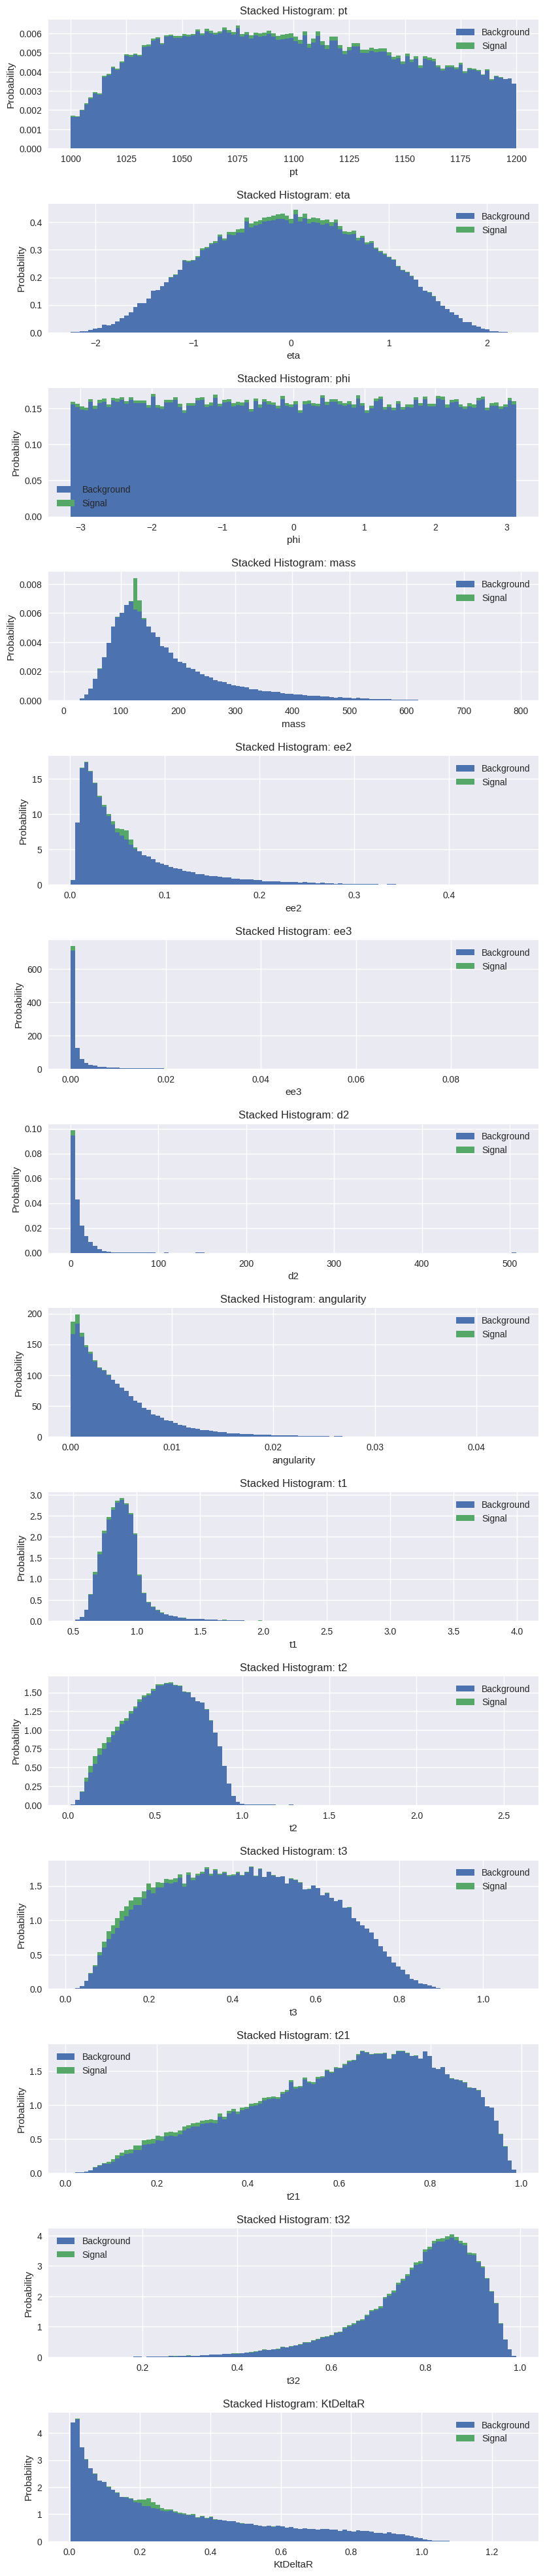

In [11]:
fig, ax = plt.subplots(len(keys), 1, figsize=(9,40))
fig.tight_layout(pad=4)

for i in range(len(keys)):

    bkg_i = background_dict[keys[i]]
    sig_i = signal_dict[keys[i]]

    data = [bkg_i, sig_i]
    
    bkg_weight = np.array([2000]*len(bkg_i))
    sig_weight = np.array([50]*len(sig_i))

    a = ax[i].hist(data, bins=100, density=True, stacked=True, weights=[bkg_weight, sig_weight], label=["Background", "Signal"])

    ax[i].set_xlabel(keys[i])
    ax[i].set_ylabel("Probability")
    ax[i].set_title("Stacked Histogram: "+str(keys[i]))

    ax[i].legend(loc=0)
plt.show()

In [12]:
bins = 100
expected_sig_array = np.zeros([len(keys), bins])
max_index = np.zeros(len(keys))
bkg_hist = np.zeros([len(keys), bins])

for i in range(len(keys)):
    bkg_i = background_dict[keys[i]]
    sig_i = signal_dict[keys[i]]

    data = [bkg_i, sig_i]
    a = plt.hist(data, bins=100, density=True, stacked=True, weights=[bkg_weight, sig_weight], label=["Background", "Signal"])
    
    bkg_hist_i = plt.hist(bkg_i, bins, range=[0,round(a[1][-1])], weights=bkg_weight / 100000)
    sig_hist_i = plt.hist(sig_i, bins, range=[0,round(a[1][-1])], weights=sig_weight / 100000)
    
    for j in range(bins):
        qcd = bkg_hist_i[0][j]
        higgs = sig_hist_i[0][j]
        prob = stats.poisson.cdf(qcd+higgs, qcd, loc=0)
        expected_sig = stats.norm.ppf(prob, loc=0, scale=1)
        expected_sig_array[i][j] = expected_sig
        
        expected_sig_array[np.isinf(expected_sig_array)] = 0
        
    max_index = np.where(expected_sig_array[i] == np.max(expected_sig_array[i]))[0][0]
        
    print(str(keys[i])+": Highest sig "+str(round(expected_sig_array[i][max_index],2))+
          ", Location "+str(round(bkg_hist_i[1][max_index],2))+", Index "+str(max_index))
    
    plt.close()

pt: Highest sig 0.48, Location 1104.0, Index 92
eta: Highest sig 0.5, Location 1.88, Index 94
phi: Highest sig 0.3, Location 0.99, Index 33
mass: Highest sig 2.32, Location 126.72, Index 16
ee2: Highest sig 2.06, Location 0.47, Index 97
ee3: Highest sig 2.06, Location 0.08, Index 58
d2: Highest sig 2.06, Location 86.36, Index 17
angularity: Highest sig 1.43, Location 0.04, Index 54
t1: Highest sig 2.06, Location 0.44, Index 11
t2: Highest sig 2.06, Location 1.35, Index 45
t3: Highest sig 2.06, Location 0.93, Index 93
t21: Highest sig 1.43, Location 0.01, Index 1
t32: Highest sig 2.06, Location 0.04, Index 4
KtDeltaR: Highest sig 1.13, Location 0.22, Index 22


The highest signficiance was mass with a value of 2.32. Didn't tell me much about where to look, and none of the significances were particularly high.

In [13]:
bkg_hist_i

(array([ 36.68, 115.86,  87.38,  72.54,  62.18,  58.6 ,  52.12,  51.76,
         46.48,  43.88,  42.04,  41.56,  39.1 ,  36.04,  35.06,  34.18,
         31.64,  32.08,  29.9 ,  28.52,  28.48,  27.08,  25.72,  25.52,
         25.48,  23.7 ,  23.06,  22.6 ,  23.18,  22.42,  21.  ,  20.64,
         20.4 ,  19.98,  19.7 ,  19.18,  17.9 ,  18.6 ,  17.66,  17.8 ,
         17.66,  16.18,  16.  ,  16.  ,  15.7 ,  14.7 ,  15.44,  14.8 ,
         13.56,  12.78,  13.44,  13.46,  12.34,  12.22,  11.68,  11.1 ,
         11.52,  11.68,  11.26,  11.24,  11.54,  10.66,  10.6 ,  10.6 ,
          9.66,   9.16,   9.56,   9.46,   8.9 ,   9.64,   8.86,   8.78,
          9.64,   9.1 ,   8.94,   8.78,   7.82,   8.26,   8.72,   7.84,
          7.5 ,   7.98,   7.46,   8.04,   7.74,   7.02,   6.98,   6.24,
          6.52,   6.06,   6.28,   6.1 ,   5.82,   5.18,   5.04,   4.56,
          4.6 ,   3.2 ,   3.08,   2.78]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 

Varying the bin size

In [14]:
a[1][-1]

1.268861790843722

In [ ]:
bin_array = np.arange(1,101)
expected_sig_array = np.zeros([len(keys), len(bin_array)])
max_index = np.zeros(len(keys))
# bkg_hist = np.zeros([len(keys), bins])

max_sig_array = np.zeros([len(bin_array), len(keys)])
max_location_array = np.zeros([len(bin_array), len(keys)])

for k in range(len(bin_array)):
    bins = bin_array[k]
    print(bins)

    for i in range(len(keys)):

        print(i)
        bkg_i = background_dict[keys[i]]
        sig_i = signal_dict[keys[i]]

        data = [bkg_i, sig_i]
        a = plt.hist(data, bins, density=True, stacked=True, weights=[bkg_weight, sig_weight], label=["Background", "Signal"])

        bkg_hist_i = plt.hist(bkg_i, bins, range=[0,round(a[1][-1])], weights=bkg_weight / 100000)
        sig_hist_i = plt.hist(sig_i, bins, range=[0,round(a[1][-1])], weights=sig_weight / 100000)
        
        plt.close()

        for j in range(bins-1):
            print(j)
            qcd = bkg_hist_i[0][j]
            higgs = sig_hist_i[0][j]
            prob = stats.poisson.cdf(qcd+higgs, qcd, loc=0)
            expected_sig = stats.norm.ppf(prob, loc=0, scale=1)
            expected_sig_array[i][j] = expected_sig

            expected_sig_array[np.isinf(expected_sig_array)] = 0

        max_index = np.where(expected_sig_array[i] == np.max(expected_sig_array[i]))[0][0]
        max_sig = expected_sig_array[i][max_index]
        location = bkg_hist_i[1][max_index]
        
        max_sig_array[k][i] = max_sig

#     print(str(keys[i])+": Highest sig "+str(round(expected_sig_array[i][max_index],2))+
#               ", Location "+str(round(bkg_hist_i[1][max_index],2))+", Index "+str(max_index))
    
    

In [27]:
np.min(signal_dict[key])

1000.0128583108161

In [ ]:
fig, ax = plt.subplots(1,1)

bin_array = np.arange(1,101)
max_sig_array = np.zeros([len(bin_array), len(keys)])

bkg_weight = np.array([2000]*len(background_dict[keys]))
sig_weight = np.array([50]*len(signal_dict[keys]))

max_sig_array = []

for key in keys:
    
    max_array = []
    for i in range(len(bin_array)):
        bins = bin_array[i]
        
        data = [background_dict[key], signal_dict[key]]
        
        low = np.min(signal_dict[key])
        high = np.max(signal_dict[key])
        
        bkg_hist = plt.hist(background_dict[key], bins, range=[low, high], weights=bkg_weight / 100000)
        sig_hist = plt.hist(signal_dict[key], bins, range=[low, high], weights=sig_weight / 100000)
        
        plt.close()
        
        cut_sigs = []
        
        for j in range(bins):
            qcd = bkg_hist[0][j]
            higgs = sig_hist[0][j]
            prob = stats.poisson.cdf(qcd+higgs, qcd, loc=0)
            expected_sig = stats.norm.ppf(prob, loc=0, scale=1)
            if expected_sig != float('inf'):
                cut_sigs.append(expected_sig)
        
        max_index = np.argmax(cut_sigs)
        max_array.append([bins, cut_sigs[max_index], max_index])
        
    max_sigs = []
    max_bins = []
    for k in range(len(max_array)):
        max_sigs.append(max_array[k][1])
        max_bins.append(max_array[k][0])
        
        max_sig = max(max_sigs)
        max_ind = np.argmax(max_sigs)
        max_bin = max_bins[max_ind]
        
    bottom_val = low + max_array[max_bin][2] * ((high - low) / max_array[max_bin][0])
    top_val = bottom_val + ((high - low) / max_array[max_bin][0])
    max_sig_array.append([max_sig, max_bin])
    print(str(key)+": Max significance = "+str(round(max_sig,3))+" with "+str(max_bin)+" bins.")
    print("Optimal cut is between "+str(round(bottom_val,3))+" - "+str(round(top_val,3)))
    print("------")

pt: Max significance = 1.123 with 1 bins.
Optimal cut is between 1097.911 - 1195.808
------
eta: Max significance = 1.147 with 3 bins.
Optimal cut is between -0.019 - 0.949
------
phi: Max significance = 1.107 with 1 bins.
Optimal cut is between 0.0 - 3.142
------
mass: Max significance = 4.248 with 31 bins.
Optimal cut is between 125.774 - 129.894
------
ee2: Max significance = 1.999 with 6 bins.
Optimal cut is between 0.056 - 0.066
------
ee3: Max significance = 1.591 with 5 bins.
Optimal cut is between 0.0 - 0.0
------
d2: Max significance = 2.033 with 48 bins.
Optimal cut is between 0.309 - 1.425
------
angularity: Max significance = 1.772 with 32 bins.
Optimal cut is between 0.0 - 0.001
------
t1: Max significance = 2.058 with 16 bins.
Optimal cut is between 3.567 - 3.757
------
t2: Max significance = 2.058 with 10 bins.
Optimal cut is between 1.381 - 1.547
------
t3: Max significance = 2.058 with 21 bins.
Optimal cut is between 0.919 - 0.961
------


In [98]:
max_array

[[1, 1.1230801057542785, 0],
 [2, 1.2207898360478147, 0],
 [3, 1.1709461122604394, 0],
 [4, 0.9497054856999407, 1],
 [5, 1.8834141902742623, 1],
 [6, 1.8908002446202683, 1],
 [7, 1.7170419478340662, 1],
 [8, 1.341384740205906, 1],
 [9, 1.7693600033899513, 2],
 [10, 2.029574190086553, 2],
 [11, 1.9164390864356566, 2],
 [12, 1.5833605799664865, 2],
 [13, 1.5389438335685561, 3],
 [14, 2.000242112758733, 3],
 [15, 2.0387585237242023, 3],
 [16, 1.765984793038839, 3],
 [17, 1.40968235509489, 4],
 [18, 1.7631939565484676, 4],
 [19, 1.9777786545092677, 4],
 [20, 1.917524171359629, 4],
 [21, 1.5526165790376087, 4],
 [22, 1.596924413188502, 5],
 [23, 1.9213332220522348, 5],
 [24, 1.9426664961648055, 5],
 [25, 1.690615635718885, 5],
 [26, 1.5336311974303602, 6],
 [27, 1.711231465520223, 6],
 [28, 1.83434705796932, 6],
 [29, 1.7338988226401872, 6],
 [30, 1.4891042874546123, 6],
 [31, 1.57558383471601, 7],
 [32, 1.7394543199974055, 7],
 [33, 1.795326708816308, 7],
 [34, 1.5291429585788774, 7],
 [35